In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from scipy.stats import linregress

%matplotlib inline

# Import the Alphavantage API key
from config import api_key

#import Yahoo finance database. It contains historical stock data
import yfinance as yf


from datetime import datetime


In [2]:
# Define the stock symbols for each sector
solar_symbols = ["TAN", "ENPH", "SEDG", "FSLR", "SKYS", "SOL", "SPWR", "AEIS", "SUNW", "VSLR"]
hydrogen_symbols = ["HYDR", "PLUG", "BLDP", "BE", "HYSR", "NXHSF", "NEWH", "ATCO", "MOTNF", "VENG"]
wind_symbols = ["FAN", "TAC", "TRIC", "AMSC", "VWS", "EXC", "NEE", "XEL", "AGR", "AEE"]

##Using Yahoo finance library:

In [3]:
#Process stocks using Pandas library yahoo finance.

# Define a function to download stock data and add sector column
def download_sector_data(tickers, sector_name):
    data = yf.download(tickers, start="2014-01-01", end="2024-09-17", group_by="ticker")
    sector_data = pd.DataFrame()
    for ticker in tickers:
        stock_data = data[ticker]['Adj Close'].rename(ticker)
        sector_data = pd.concat([sector_data, stock_data], axis=1)
    return sector_data


In [4]:

def download_sector_data(tickers, sector_name):
    data = yf.download(tickers, start="2014-01-01", end="2024-09-17", group_by="ticker")
    
    # Initialize an empty DataFrame to store all stock data
    sector_data = pd.DataFrame()
    
    for ticker in tickers:
        # Get the stock data for this ticker
        stock_data = data[ticker][['Adj Close', 'Volume']].copy()
        stock_data.reset_index(inplace=True)
        
        # Rename columns to match desired format
        stock_data.rename(columns={'Adj Close': 'Price', 'Date': 'Date'}, inplace=True)
        stock_data['Symbol'] = ticker
        
        # Reorder columns as "Symbol", "Date", "Price", "Volume"
        stock_data = stock_data[['Symbol', 'Date', 'Price', 'Volume']]
        
        # Concatenate the data into the main DataFrame
        sector_data = pd.concat([sector_data, stock_data], axis=0)
    
    return sector_data



In [5]:

solar_data_df = download_sector_data(solar_symbols, 'Solar')
solar_data_df.head()


[*********************100%***********************]  10 of 10 completed

3 Failed downloads:
['VSLR', 'SKYS', 'SUNW']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Price,Symbol,Date,Price,Volume
0,TAN,2014-01-02 00:00:00+00:00,33.838985,697800.0
1,TAN,2014-01-03 00:00:00+00:00,34.178627,590200.0
2,TAN,2014-01-06 00:00:00+00:00,34.250130,682600.0
3,TAN,2014-01-07 00:00:00+00:00,35.349491,826300.0
4,TAN,2014-01-08 00:00:00+00:00,35.724888,619500.0


In [6]:
wind_data_df = download_sector_data(wind_symbols, 'Wind')
wind_data_df.head()

[*********************100%***********************]  10 of 10 completed

1 Failed download:
['TRIC']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2014-01-01 -> 2024-09-17)')


Price,Symbol,Date,Price,Volume
0,FAN,2014-01-02 00:00:00+00:00,8.745198,308500.0
1,FAN,2014-01-03 00:00:00+00:00,8.853836,63100.0
2,FAN,2014-01-06 00:00:00+00:00,9.078868,116700.0
3,FAN,2014-01-07 00:00:00+00:00,9.249579,62500.0
4,FAN,2014-01-08 00:00:00+00:00,9.125424,88000.0


In [7]:
hydrogen_data_df = download_sector_data(hydrogen_symbols, 'Hydrogen')
hydrogen_data_df.head()

[*********************100%***********************]  10 of 10 completed

1 Failed download:
['ATCO']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Price,Symbol,Date,Price,Volume
0,HYDR,2014-01-02 00:00:00+00:00,NaN,NaN
1,HYDR,2014-01-03 00:00:00+00:00,NaN,NaN
2,HYDR,2014-01-06 00:00:00+00:00,NaN,NaN
3,HYDR,2014-01-07 00:00:00+00:00,NaN,NaN
4,HYDR,2014-01-08 00:00:00+00:00,NaN,NaN


In [8]:
# Function to download stock data and calculate cumulative returns
def calculate_cumulative_returns(tickers):
    data = yf.download(tickers, start="2014-01-01", end="2024-09-17", group_by="ticker")
    cumulative_returns = pd.DataFrame()
    for ticker in tickers:
        stock_data = data[ticker]['Adj Close'].rename(ticker)
        returns = stock_data / stock_data.iloc[0] - 1  # Calculate cumulative returns
        cumulative_returns = pd.concat([cumulative_returns, returns], axis=1)
    return cumulative_returns

# Download and calculate cumulative returns for each sector
solar_returns = calculate_cumulative_returns(solar_symbols)
hydrogen_returns = calculate_cumulative_returns(hydrogen_symbols)
wind_returns = calculate_cumulative_returns(wind_symbols)

[*********************100%***********************]  10 of 10 completed

3 Failed downloads:
['SUNW', 'VSLR', 'SKYS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  10 of 10 completed

1 Failed download:
['ATCO']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  10 of 10 completed

1 Failed download:
['TRIC']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2014-01-01 -> 2024-09-17)')


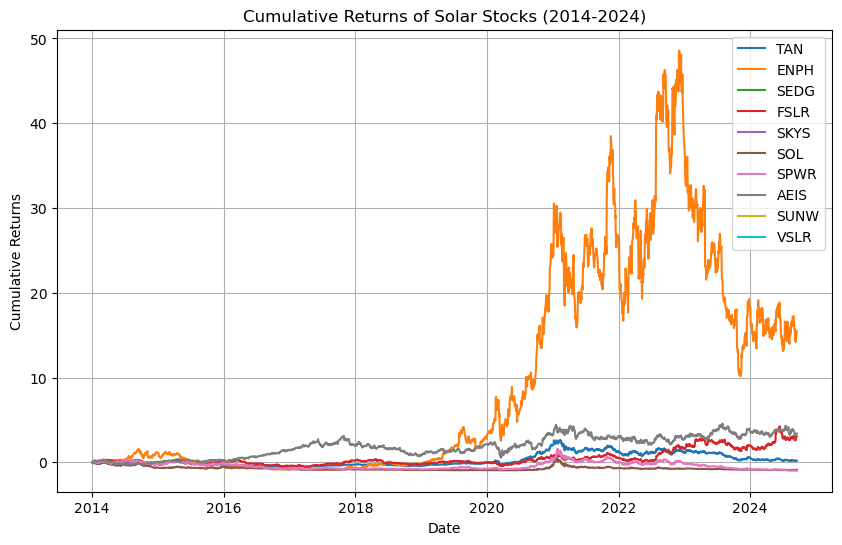

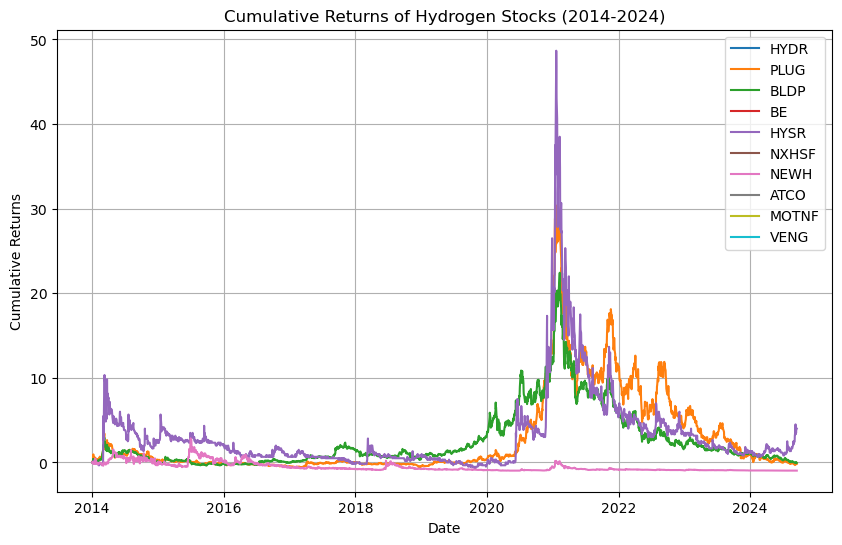

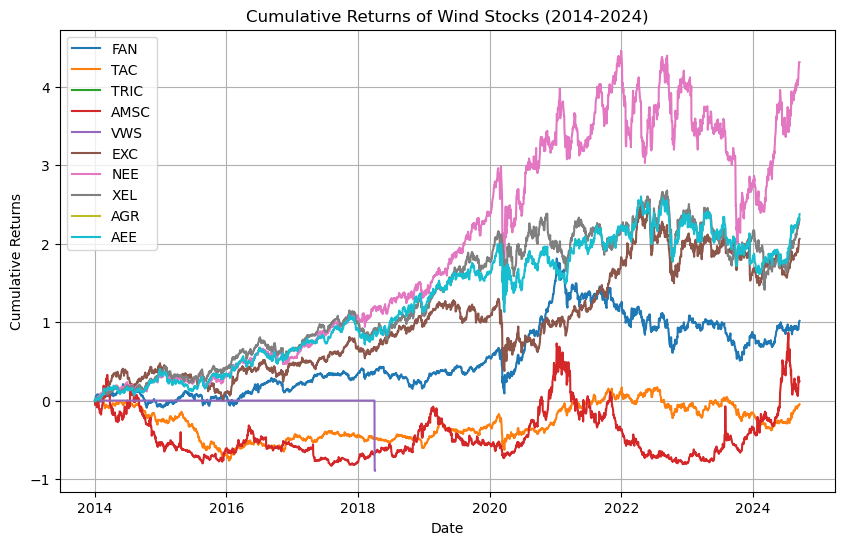

In [9]:
# Plot function for cumulative returns
def plot_cumulative_returns(returns, sector_name):
    plt.figure(figsize=(10,6))
    for column in returns.columns:
        plt.plot(returns.index, returns[column], label=column)
    plt.title(f'Cumulative Returns of {sector_name} Stocks (2014-2024)')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend(loc='best')
    plt.grid(True)
    
    # Save the figure to a .png file, dynamically naming based on the sector
    plt.savefig(f'{sector_name}_cumulative_returns.png') 
    
    plt.show()

# Plot cumulative returns for Solar, Hydrogen, and Wind sectors
plot_cumulative_returns(solar_returns, 'Solar') 
plot_cumulative_returns(hydrogen_returns, 'Hydrogen')
plot_cumulative_returns(wind_returns, 'Wind')



In [10]:
#Which individual stocks within each sector have outperformed their peers?
# Calculate the total cumulative return at the end of the period for each stock in a sector
def get_top_performers(cumulative_returns):
    # Get the cumulative return at the last date for each stock
    final_returns = cumulative_returns.iloc[-1]
    
    # Sort the stocks by their final cumulative return in descending order
    sorted_returns = final_returns.sort_values(ascending=False)
    
    # Display the top performers
    print("Top Performers:\n")
    pprint(sorted_returns)
    
    return sorted_returns

# Get the top performers for each sector
solar_top_performers = get_top_performers(solar_returns)
hydrogen_top_performers = get_top_performers(hydrogen_returns)
wind_top_performers = get_top_performers(wind_returns)




Top Performers:

ENPH    15.443952
AEIS     3.389322
FSLR     3.061804
TAN      0.198913
SOL     -0.886294
SPWR    -0.999054
SEDG          NaN
SKYS          NaN
SUNW          NaN
VSLR          NaN
Name: 2024-09-16 00:00:00+00:00, dtype: float64
Top Performers:

HYSR     4.000000
BLDP    -0.051429
PLUG    -0.154506
NEWH    -0.965530
HYDR          NaN
BE            NaN
NXHSF         NaN
ATCO          NaN
MOTNF         NaN
VENG          NaN
Name: 2024-09-16 00:00:00+00:00, dtype: float64
Top Performers:

NEE     4.310926
AEE     2.375174
XEL     2.310007
EXC     2.059105
FAN     1.014820
AMSC    0.245977
TAC    -0.047261
TRIC         NaN
VWS          NaN
AGR          NaN
Name: 2024-09-16 00:00:00+00:00, dtype: float64


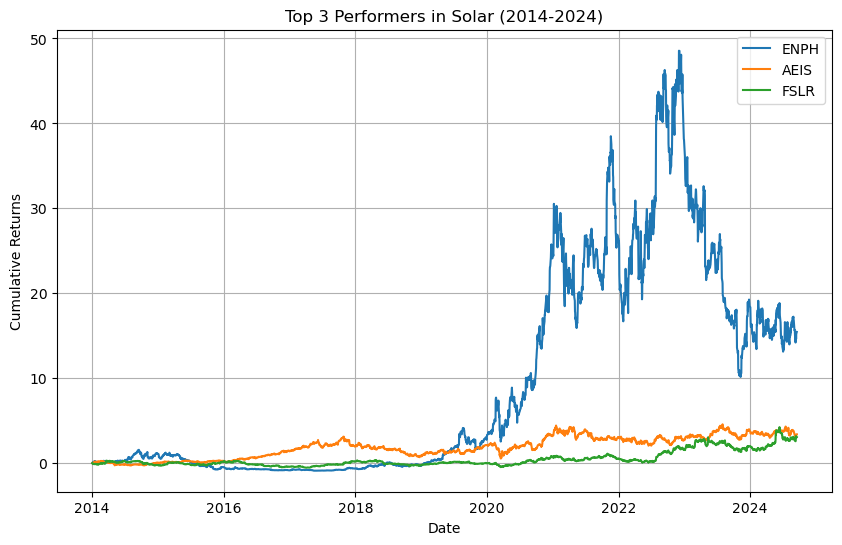

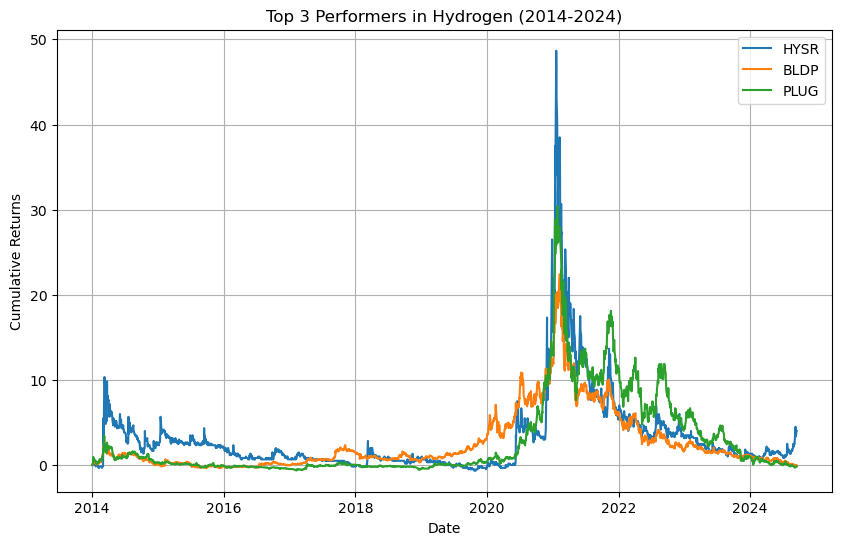

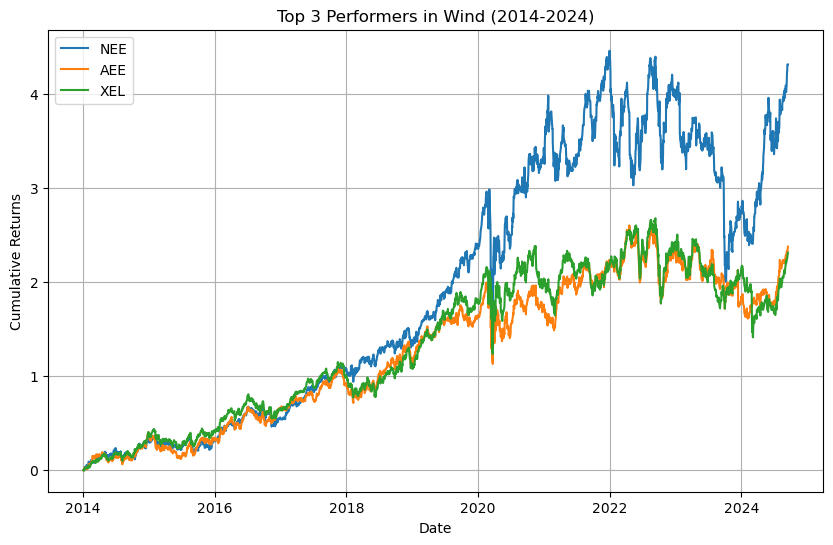

In [11]:
#Plot only 3 top performing stocks
def plot_top_performers(returns, top_performers, sector_name, top_n=3):
    plt.figure(figsize=(10,6))
    for stock in top_performers.index[:top_n]:
        plt.plot(returns.index, returns[stock], label=stock)
    plt.title(f'Top {top_n} Performers in {sector_name} (2014-2024)')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend(loc='best')
    plt.grid(True)
    
    # Save the figure to a .png file
    plt.savefig(f'top_{top_n}_{sector_name}_performers.png')
    
    plt.show()

# Plot the top 3 performers in each sector
plot_top_performers(solar_returns, solar_top_performers, 'Solar')
plot_top_performers(hydrogen_returns, hydrogen_top_performers, 'Hydrogen')
plot_top_performers(wind_returns, wind_top_performers, 'Wind')


In [12]:
#Process Solar Stocks
oldest_date = "2014-01-31"

time_function = "TIME_SERIES_MONTHLY"
base_url = "https://www.alphavantage.co/query?"

solar_data = []

for symbol in solar_symbols[:2]:
    finished_url = f"{base_url}function={time_function}&symbol={symbol}&apikey={api_key}"
    print(f"Processing {symbol}")

    result_data = requests.get(finished_url).json()

    print(f"{result_data=}")

    time.sleep(12)  # Adjust sleep time as needed (12 seconds to avoid hitting API rate limits)

    for monthly in result_data.get("Monthly Time Series", {}):
        monthly_date = time.strptime(monthly, "%Y-%m-%d")
        oldest = time.strptime(oldest_date, "%Y-%m-%d")
        if monthly_date < oldest:
            continue
        stock_date = monthly
        stock_close = result_data["Monthly Time Series"][monthly]["4. close"]
        solar_data.append({
            "Symbol": symbol,
            "Date": stock_date,
            "Closing Price": stock_close
        })

# Create DataFrame after collecting all data
solar_data_df = pd.DataFrame(solar_data)

solar_data_df.head()


Processing TAN
result_data={'Meta Data': {'1. Information': 'Monthly Prices (open, high, low, close) and Volumes', '2. Symbol': 'TAN', '3. Last Refreshed': '2024-09-20', '4. Time Zone': 'US/Eastern'}, 'Monthly Time Series': {'2024-09-20': {'1. open': '41.2400', '2. high': '43.1400', '3. low': '37.3300', '4. close': '40.6600', '5. volume': '15406103'}, '2024-08-30': {'1. open': '42.4800', '2. high': '43.1700', '3. low': '37.4200', '4. close': '41.2800', '5. volume': '17518322'}, '2024-07-31': {'1. open': '40.0100', '2. high': '44.7400', '3. low': '38.6800', '4. close': '42.1300', '5. volume': '27008279'}, '2024-06-28': {'1. open': '49.4000', '2. high': '49.9300', '3. low': '40.0100', '4. close': '40.2100', '5. volume': '22797496'}, '2024-05-31': {'1. open': '40.1200', '2. high': '49.4900', '3. low': '40.1200', '4. close': '48.2800', '5. volume': '30699120'}, '2024-04-30': {'1. open': '45.2800', '2. high': '45.8950', '3. low': '38.8300', '4. close': '40.3300', '5. volume': '28546574'}, '

,Symbol,Date,Closing Price
0,TAN,2024-09-20,40.6600
1,TAN,2024-08-30,41.2800
2,TAN,2024-07-31,42.1300
3,TAN,2024-06-28,40.2100
4,TAN,2024-05-31,48.2800


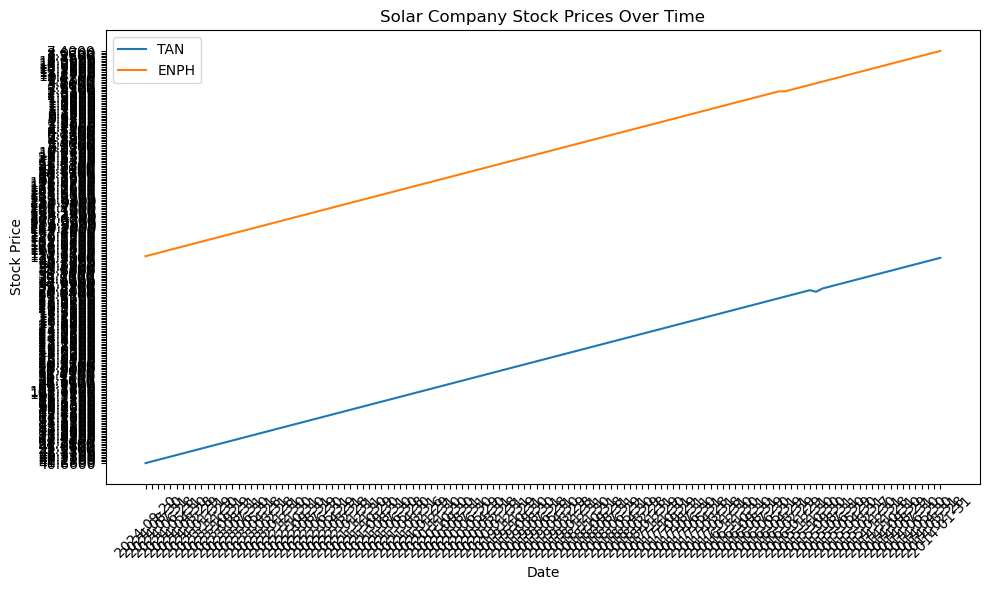

In [13]:
plt.figure(figsize=(10,6))
for symbol in solar_data_df['Symbol'].unique():
    company_data = solar_data_df[solar_data_df['Symbol'] == symbol]
    plt.plot(company_data['Date'], company_data['Closing Price'], label=symbol)

plt.title('Solar Company Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

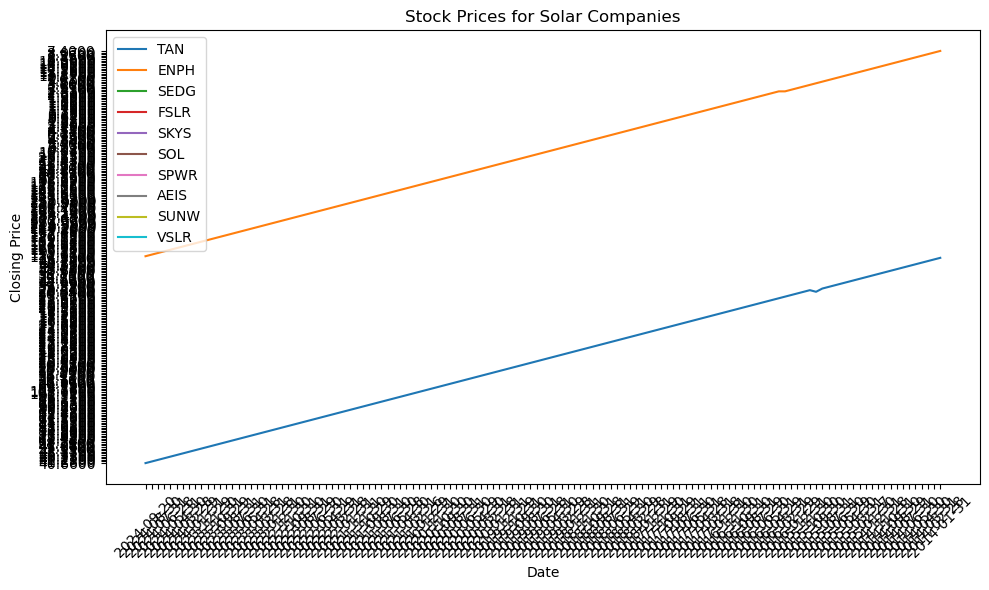

In [14]:
# Plot Solar Stocks
plt.figure(figsize=(10, 6))

for symbol in solar_symbols:
    # Filter data for each stock symbol
    solar_stock_data = solar_data_df[solar_data_df['Symbol'] == symbol]
    
    # Plot stock data
    plt.plot(solar_stock_data['Date'], solar_stock_data['Closing Price'], label=symbol)

plt.title('Stock Prices for Solar Companies')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

In [15]:
#Process Wind Stocks
oldest_date = "2014-01-31"

time_function = "TIME_SERIES_MONTHLY"
base_url = "https://www.alphavantage.co/query?"

wind_data = []

for symbol in wind_symbols:
    finished_url = f"{base_url}function={time_function}&symbol={symbol}&apikey={api_key}"
    print(f"Processing {symbol}")

    result_data = requests.get(finished_url).json()

    time.sleep(12)  # Adjust sleep time as needed (12 seconds to avoid hitting API rate limits)

    for monthly in result_data.get("Monthly Time Series", {}):
        monthly_date = time.strptime(monthly, "%Y-%m-%d")
        oldest = time.strptime(oldest_date, "%Y-%m-%d")
        if monthly_date < oldest:
            continue
        stock_date = monthly
        stock_close = result_data["Monthly Time Series"][monthly]["4. close"]
        wind_data.append({
            "Symbol": symbol,
            "Date": stock_date,
            "Closing Price": stock_close
        })

# Create DataFrame after collecting all data
wind_data_df = pd.DataFrame(wind_data)
wind_data_df.head()

Processing FAN
Processing TAC
Processing TRIC
Processing AMSC
Processing VWS
Processing EXC
Processing NEE
Processing XEL
Processing AGR
Processing AEE


,Symbol,Date,Closing Price
0,FAN,2024-09-20,17.7700
1,FAN,2024-08-30,16.9850
2,FAN,2024-07-31,17.0900
3,FAN,2024-06-28,16.2100
4,FAN,2024-05-31,17.4400


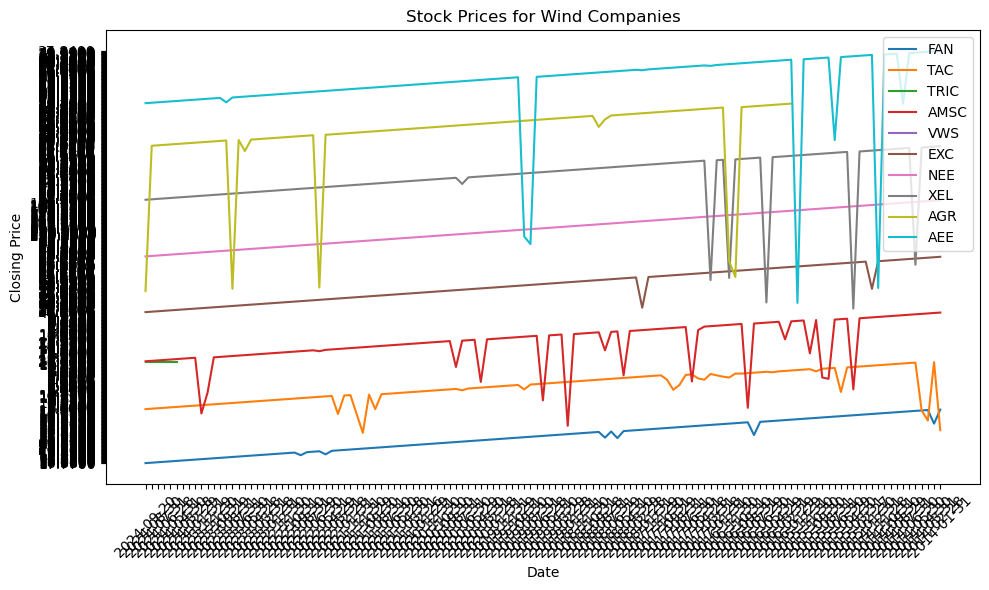

In [16]:
# Plot Wind Stocks
plt.figure(figsize=(10, 6))

for symbol in wind_symbols:
    # Filter data for each stock symbol
    wind_stock_data = wind_data_df[wind_data_df['Symbol'] == symbol]
    
    # Plot stock data
    plt.plot(wind_stock_data['Date'], wind_stock_data['Closing Price'], label=symbol)

plt.title('Stock Prices for Wind Companies')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

In [17]:
#Process Hydrogen Stocks
oldest_date = "2014-01-31"

time_function = "TIME_SERIES_MONTHLY"
base_url = "https://www.alphavantage.co/query?"

hydrogen_data = []

for symbol in hydrogen_symbols:
    finished_url = f"{base_url}function={time_function}&symbol={symbol}&apikey={api_key}"
    print(f"Processing {symbol}")

    result_data = requests.get(finished_url).json()

    time.sleep(12)  # Adjust sleep time as needed (12 seconds to avoid hitting API rate limits)

    for monthly in result_data.get("Monthly Time Series", {}):
        monthly_date = time.strptime(monthly, "%Y-%m-%d")
        oldest = time.strptime(oldest_date, "%Y-%m-%d")
        if monthly_date < oldest:
            continue
        stock_date = monthly
        stock_close = result_data["Monthly Time Series"][monthly]["4. close"]
        hydrogen_data.append({
            "Symbol": symbol,
            "Date": stock_date,
            "Closing Price": stock_close
        })

# Create DataFrame after collecting all data
hydrogen_data_df = pd.DataFrame(wind_data)
hydrogen_data_df.head()

Processing HYDR
Processing PLUG
Processing BLDP
Processing BE


KeyboardInterrupt: 

In [ ]:
# Plot Wind Stocks
plt.figure(figsize=(10, 6))

for symbol in hydrogen_symbols:
    # Filter data for each stock symbol
    hydrogen_stock_data = hydrogen_data_df[hydrogen_data_df['Symbol'] == symbol]
    
    # Plot stock data
    plt.plot(hydrogen_stock_data['Date'], hydrogen_stock_data['Closing Price'], label=symbol)

plt.title('Stock Prices for Hydrogen Companies')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
#Find outperforming stocks in each category and find what might be contributing to their success
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate percentage change from the first available price
def calculate_percentage_change(df, symbols):
    percentage_change_data = pd.DataFrame()
    
    for symbol in symbols:
        stock_data = df[df['Symbol'] == symbol].sort_values(by='Date')
        
        # Calculate percentage change relative to the first available price
        stock_data['Percentage Change'] = (stock_data['Closing Price'] / stock_data['Closing Price'].iloc[0]) * 100
        
        # Store the percentage change and date for plotting
        percentage_change_data = pd.concat([percentage_change_data, stock_data[['Date', 'Percentage Change', 'Symbol']]])
    
    return percentage_change_data

# List of hydrogen, solar, and wind symbols (replace with actual data)
hydrogen_symbols = ["HYD1", "HYD2", "HYD3"]
solar_symbols = ["TAN", "ENPH", "SEDG", "FSLR", "SKYS", "SOL", "SPWR", "AEIS", "SUNW", "VSLR"]
wind_symbols = ["WND1", "WND2", "WND3"]

# Assuming hydrogen_data_df, solar_data_df, and wind_data_df DataFrames contain stock data for each category

# Calculate percentage changes
hydrogen_percentage_data = calculate_percentage_change(hydrogen_data_df, hydrogen_symbols)
solar_percentage_data = calculate_percentage_change(solar_data_df, solar_symbols)
wind_percentage_data = calculate_percentage_change(wind_data_df, wind_symbols)

# Plotting function for percentage changes
def plot_percentage_change(percentage_change_data, title):
    plt.figure(figsize=(10, 6))
    
    # Loop through each stock and plot the percentage change
    for symbol in percentage_change_data['Symbol'].unique():
        stock_data = percentage_change_data[percentage_change_data['Symbol'] == symbol]
        plt.plot(stock_data['Date'], stock_data['Percentage Change'], label=symbol)
    
    # Customize plot
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Percentage Change (%)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot the percentage changes for each category
plot_percentage_change(hydrogen_percentage_data, 'Percentage Change for Hydrogen Companies')
plot_percentage_change(solar_percentage_data, 'Percentage Change for Solar Companies')
plot_percentage_change(wind_percentage_data, 'Percentage Change for Wind Companies')



In [ ]:
#Process all stocks
oldest_date = "2014-01-31"
company_symbols = [
    "TAN","ENPH","SEDG","FSLR","SKYS", "SOL", "SPWR", "AEIS", "SUNW", "VSLR",
    "HYDR","PLUG","BLDP","BE", "HYSR", "NXHSF", "NEWH", "ATCO", "MOTNF", "VENG"
    "FAN","TAC","TPIC","AMSC","VWS", "EXC", "NEE", "XEL", "AGR", "AEE"
]
time_function = "TIME_SERIES_MONTHLY"
base_url = "https://www.alphavantage.co/query?"
api_key = 'your_alpha_vantage_api_key'
company_data = []

for symbol in company_symbols:
    finished_url = f"{base_url}function={time_function}&symbol={symbol}&apikey={api_key}"
    print(f"Processing {symbol}")

    result_data = requests.get(finished_url).json()

    time.sleep(12)  # Adjust sleep time as needed (12 seconds to avoid hitting API rate limits)

    for monthly in result_data.get("Monthly Time Series", {}):
        monthly_date = time.strptime(monthly, "%Y-%m-%d")
        oldest = time.strptime(oldest_date, "%Y-%m-%d")
        if monthly_date < oldest:
            continue
        stock_date = monthly
        stock_close = result_data["Monthly Time Series"][monthly]["4. close"]
        company_data.append({
            "Symbol": symbol,
            "Date": stock_date,
            "Closing Price": stock_close
        })

# Create DataFrame after collecting all data
company_data_df = pd.DataFrame(company_data)
print("All stocks:  ")
company_data_df.head()


In [ ]:


oldest_date = "2014-01-31"
company_symbols = [
    "TAN",
    "ENPH",
    "SEDG",
    "FSLR",
    "HYDR",
    "PLUG",
    "BLDP",
    "BE",
    "FAN",
    "TAC",
    "TPIC",
    "AMSC"
]
time_function = "TIME_SERIES_MONTHLY"
base_url = "https://www.alphavantage.co/query?"
api_key = 'your_alpha_vantage_api_key'
company_data = []

for symbol in company_symbols:
    finished_url = f"{base_url}function={time_function}&symbol={symbol}&apikey={api_key}"
    print(f"Processing {symbol}")

    result_data = requests.get(finished_url).json()

    time.sleep(12)  # Adjust sleep time as needed (12 seconds to avoid hitting API rate limits)

    for monthly in result_data.get("Monthly Time Series", {}):
        monthly_date = time.strptime(monthly, "%Y-%m-%d")
        oldest = time.strptime(oldest_date, "%Y-%m-%d")
        if monthly_date < oldest:
            continue
        stock_date = monthly
        stock_close = result_data["Monthly Time Series"][monthly]["4. close"]
        company_data.append({
            "Symbol": symbol,
            "Date": stock_date,
            "Closing Price": stock_close
        })

# Create DataFrame after collecting all data
company_data_df = pd.DataFrame(company_data)
company_data_df.head()
